In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

tips = pd.read_csv("/Users/anjan/5m-data-1.10-visualization/data/tips.csv")

tips["tip_pct"] = tips["tip"] * 100/ (tips["total_bill"] - tips["tip"])

tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,6.320401
1,10.34,1.66,No,Sun,Dinner,3,19.124424
2,21.01,3.50,No,Sun,Dinner,3,19.988578
3,23.68,3.31,No,Sun,Dinner,2,16.249386
4,24.59,3.61,No,Sun,Dinner,4,17.206864


### Using just the Friday data to show the plots

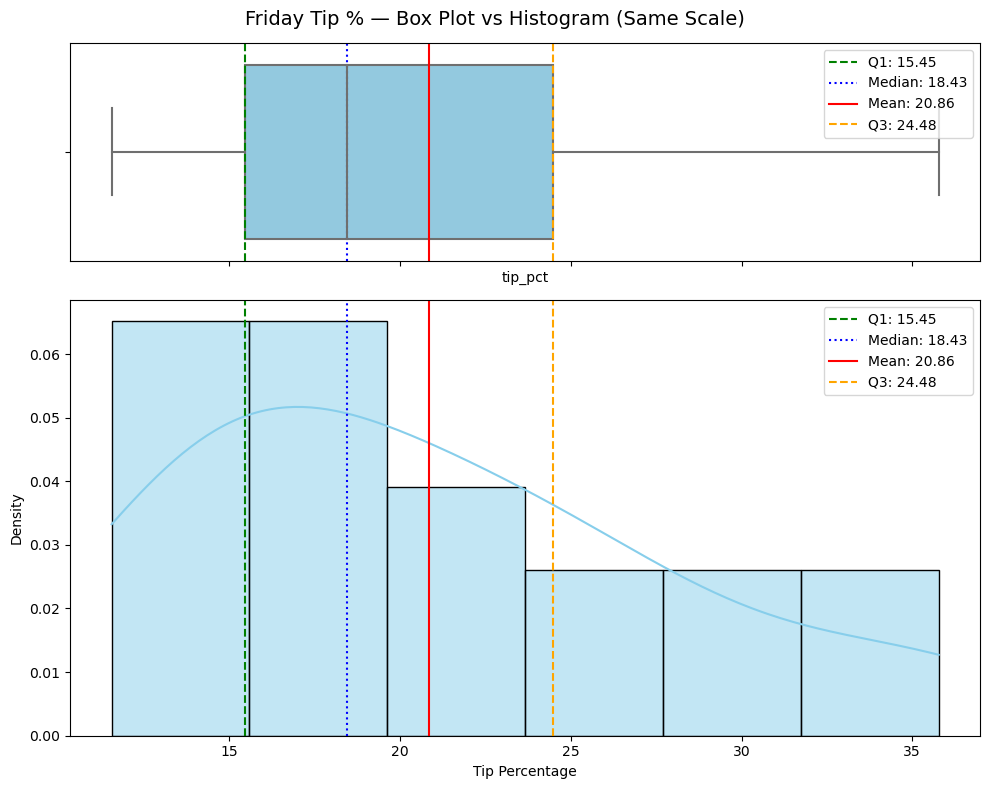

In [8]:
# Filter Friday data
friday_data = tips[tips["day"] == "Fri"]["tip_pct"]

# Calculate quartiles, median, and mean
q1 = np.percentile(friday_data, 25)
median = np.median(friday_data)
mean = friday_data.mean()
q3 = np.percentile(friday_data, 75)

# Create figure with two subplots sharing the same x-axis
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True, gridspec_kw={"height_ratios": [1, 2]})

# Box plot
sns.boxplot(x=friday_data, ax=axes[0], color="skyblue")
axes[0].axvline(q1, color="green", linestyle="--", label=f"Q1: {q1:.2f}")
axes[0].axvline(median, color="blue", linestyle=":", label=f"Median: {median:.2f}")
axes[0].axvline(mean, color="red", linestyle="-", label=f"Mean: {mean:.2f}")
axes[0].axvline(q3, color="orange", linestyle="--", label=f"Q3: {q3:.2f}")
axes[0].legend()

# Histogram + KDE
sns.histplot(friday_data, kde=True, stat="density", color="skyblue", ax=axes[1])
axes[1].axvline(q1, color="green", linestyle="--", label=f"Q1: {q1:.2f}")
axes[1].axvline(median, color="blue", linestyle=":", label=f"Median: {median:.2f}")
axes[1].axvline(mean, color="red", linestyle="-", label=f"Mean: {mean:.2f}")
axes[1].axvline(q3, color="orange", linestyle="--", label=f"Q3: {q3:.2f}")
axes[1].set_xlabel("Tip Percentage")
axes[1].set_ylabel("Density")
axes[1].legend()

plt.suptitle("Friday Tip % — Box Plot vs Histogram (Same Scale)", fontsize=14)
plt.tight_layout()
plt.show()

### What that means

The distribution is skewed right as the mean > median.

A smaller number of people give very high tips (e.g., 30%+), stretching the distribution to the right.

Those higher tips pull the mean upward, making it larger than the median.


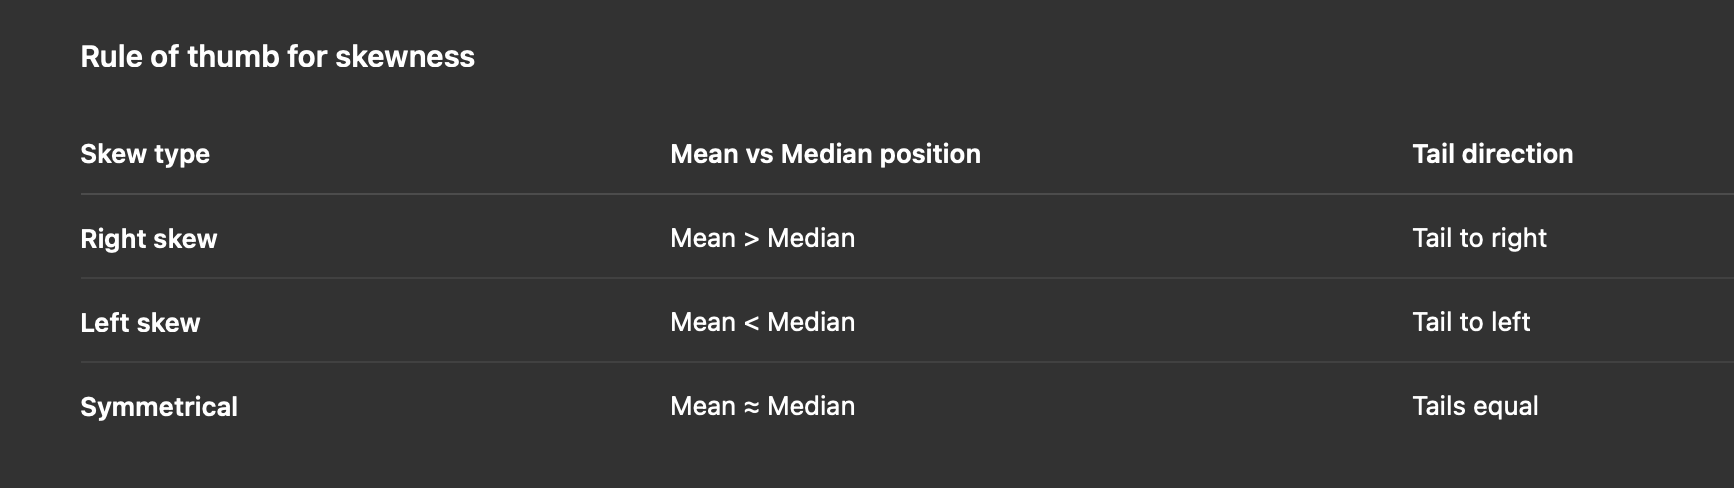